National University Thesis: NHIS Study Logistic Regression study
====

Introduction
====

This jupyter notebook is focused on doing the initial study on Self-Assessed Health (SAH) in the year of 2019 with the "high-risk" (55+) population. This study will use the 2019 National Health Interview Study that conducted its study from 2019. The variable of interest is a multi-nominal ordinal categorical outcome with outputs ranging from: 1-5 (Poor to Excellent). This research will transform the target variable to a binary output of poor health(1-2) and good health (3-5).  Past scholarly research has modeled this to effectively look at the effect size of health. This process willl include: Downloading the data, data wrangling, doing an EDA for descriptive statistics, splitting the data for validation, fitting the model, and looking at the accuracy metrics for evaluation. The metric resulting from this study will be compared with other studies to look for the change in: model accuracy, precision, recall, f-1, log odds and coefficients

Importing Libraries
====
Regression, Classification, Cluster, Association, Anomaly Detection, Recommender, Ensemble, Deep Learning

In [3]:
#Normal Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc

#Train/Test or CV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score

#DataWrangling
from scipy import stats
from scipy.stats.mstats import normaltest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

#Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

Importing Data
====

In [4]:
#import filetype
nhis1 = pd.read_csv(r"C:\Users\2-1\Downloads\adult19.csv")

In [5]:
nhis1

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31992,4,14,5,0,116204,0,100,114,2,1,...,NaN,NaN,1,1,4,10,2679.016,1965.416,H046022,7.65
31993,4,8,3,0,68000,0,100,114,2,1,...,NaN,NaN,1,1,4,10,6726.495,3920.208,H046232,2.02
31994,4,13,3,0,60000,0,100,114,2,1,...,NaN,NaN,1,1,4,10,1246.306,864.743,H043765,4.98
31995,4,14,5,0,101000,0,100,114,1,1,...,NaN,NaN,1,1,4,10,3427.198,2595.209,H017695,6.00


# Columns Used

In [6]:
#Change Column Name if necessary
nhis1.rename({"PHSTAT_A": "GEN_HEALTH",
              "EDUC_A": "EDUCATE_LVL",
              "DEPEV_A":"DEPRESS",
              "AGEP_A" : "AGE",
              "SEX_A" : "SEX",
              "MARSTAT_A" : "MARITAL_STATUS",
              "DIBEV_A" : "DIABETES",
              "CANEV_A" : "CANCER",
              "COPDEV_A" : "COPD", 
              "STREV_A" : "STROKE",
              "ARTHEV_A" : "ARTHRITIS",
              "CHDEV_A" : "HEART",
              "EMPRSNOWK_A" : "EMPLOY"
              }, axis=1, inplace=True)

In [7]:
nhis1["EMPLOY"] = nhis1["EMPLOY"].fillna(69)

In [8]:
nhis = nhis1.loc[:, ['GEN_HEALTH','AGE','SEX','MARITAL_STATUS','EDUCATE_LVL','EMPLOY','DEPRESS','ARTHRITIS','CANCER','COPD','HEART','STROKE','DIABETES']]

In [9]:
nhis

,GEN_HEALTH,AGE,SEX,MARITAL_STATUS,EDUCATE_LVL,EMPLOY,DEPRESS,ARTHRITIS,CANCER,COPD,HEART,STROKE,DIABETES
0,3,97,1,1,7,3.0,2,2,2,2,2,2,2
1,1,28,2,1,6,69.0,2,2,2,2,2,2,2
2,3,72,1,1,5,3.0,2,1,1,2,2,2,2
3,2,60,1,1,7,69.0,2,1,2,2,2,2,2
4,4,60,1,1,5,2.0,1,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31992,3,68,2,1,7,3.0,2,1,2,2,2,2,2
31993,3,47,1,1,5,69.0,2,2,2,2,2,2,2
31994,2,68,1,5,5,69.0,2,2,2,2,2,2,2
31995,2,31,2,1,7,69.0,1,2,2,2,2,2,2


In [10]:
#Review of the percentages for attribute
nhis['GEN_HEALTH'].value_counts(normalize=True)

2    0.336500
3    0.277932
1    0.226834
4    0.118230
5    0.039816
7    0.000469
9    0.000219
Name: GEN_HEALTH, dtype: float64

In [11]:
#dropping non observed observation for gen_health
nhis = nhis[nhis.GEN_HEALTH != 7]
nhis = nhis[nhis.GEN_HEALTH != 8]
nhis = nhis[nhis.GEN_HEALTH != 9]

In [12]:
#Another review of the percentages for this attribute
nhis['GEN_HEALTH'].value_counts(normalize=True)

2    0.336732
3    0.278124
1    0.226990
4    0.118311
5    0.039844
Name: GEN_HEALTH, dtype: float64

In [13]:
#recoding ordinal value
#We are reciprocating the values. Currently, 1=Excellent ~ 5=Poor
#this will flop the values 1=Poor ~ 5=Excellent
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([1],9)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([2],8)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([4],2)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([5],1)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([8],4)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([9],5)

In [14]:
#look at target variable spread
nhis['GEN_HEALTH'].value_counts(normalize=True)

4    0.336732
3    0.278124
5    0.226990
2    0.118311
1    0.039844
Name: GEN_HEALTH, dtype: float64

In [15]:
#recoding ordinal value to binary. 1=Good 0=Bad
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([2],1)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([1],1)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([5],0)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([4],0)
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].replace([3],0)
nhis

,GEN_HEALTH,AGE,SEX,MARITAL_STATUS,EDUCATE_LVL,EMPLOY,DEPRESS,ARTHRITIS,CANCER,COPD,HEART,STROKE,DIABETES
0,0,97,1,1,7,3.0,2,2,2,2,2,2,2
1,0,28,2,1,6,69.0,2,2,2,2,2,2,2
2,0,72,1,1,5,3.0,2,1,1,2,2,2,2
3,0,60,1,1,7,69.0,2,1,2,2,2,2,2
4,1,60,1,1,5,2.0,1,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31992,0,68,2,1,7,3.0,2,1,2,2,2,2,2
31993,0,47,1,1,5,69.0,2,2,2,2,2,2,2
31994,0,68,1,5,5,69.0,2,2,2,2,2,2,2
31995,0,31,2,1,7,69.0,1,2,2,2,2,2,2


In [16]:
#look at target variable spread
nhis['GEN_HEALTH'].value_counts(normalize=True)

0    0.841845
1    0.158155
Name: GEN_HEALTH, dtype: float64

In [17]:
#look at objects counts
print(nhis.dtypes.value_counts())

int64      12
float64     1
dtype: int64


In [18]:
print(nhis.dtypes)

GEN_HEALTH          int64
AGE                 int64
SEX                 int64
MARITAL_STATUS      int64
EDUCATE_LVL         int64
EMPLOY            float64
DEPRESS             int64
ARTHRITIS           int64
CANCER              int64
COPD                int64
HEART               int64
STROKE              int64
DIABETES            int64
dtype: object


Look for Null
====

In [19]:
nhis.isnull().sum()

GEN_HEALTH        0
AGE               0
SEX               0
MARITAL_STATUS    0
EDUCATE_LVL       0
EMPLOY            0
DEPRESS           0
ARTHRITIS         0
CANCER            0
COPD              0
HEART             0
STROKE            0
DIABETES          0
dtype: int64

In [20]:
#drop nulls
nhis = nhis.dropna()

In [21]:
#check for null again
nhis.isnull().sum()

GEN_HEALTH        0
AGE               0
SEX               0
MARITAL_STATUS    0
EDUCATE_LVL       0
EMPLOY            0
DEPRESS           0
ARTHRITIS         0
CANCER            0
COPD              0
HEART             0
STROKE            0
DIABETES          0
dtype: int64

In [22]:
#reset index
nhis = nhis.reset_index()
nhis.drop(['index'], axis=1, inplace=True)

# Value Distribution / Drop Rows with Certain Values

In [23]:
nhis.shape

(31975, 13)

In [24]:
nhis.columns

Index(['GEN_HEALTH', 'AGE', 'SEX', 'MARITAL_STATUS', 'EDUCATE_LVL', 'EMPLOY',
       'DEPRESS', 'ARTHRITIS', 'CANCER', 'COPD', 'HEART', 'STROKE',
       'DIABETES'],
      dtype='object')

In [25]:
nhis['EMPLOY'].value_counts(normalize=True)

69.0    0.606974
3.0     0.241345
4.0     0.065332
5.0     0.037529
6.0     0.016106
1.0     0.015168
8.0     0.012228
2.0     0.004253
7.0     0.000907
97.0    0.000125
99.0    0.000031
Name: EMPLOY, dtype: float64

In [26]:
nhis['EDUCATE_LVL'].value_counts(normalize=True)

4     0.232056
8     0.217232
5     0.163002
9     0.101016
7     0.090946
1     0.074746
6     0.039406
3     0.024269
11    0.020485
2     0.014730
10    0.013729
99    0.003753
0     0.002909
97    0.001720
Name: EDUCATE_LVL, dtype: float64

In [27]:
nhis['DEPRESS'].value_counts(normalize=True)

2    0.828616
1    0.169789
7    0.000844
9    0.000751
Name: DEPRESS, dtype: float64

In [28]:
nhis['AGE'].value_counts(normalize=True)

85    0.037592
65    0.020016
63    0.019515
60    0.019484
62    0.019390
        ...   
83    0.006724
82    0.006630
84    0.006255
97    0.002220
99    0.000250
Name: AGE, Length: 70, dtype: float64

In [29]:
nhis['SEX'].value_counts(normalize=True)

2    0.539359
1    0.460547
7    0.000094
Name: SEX, dtype: float64

In [30]:
nhis['MARITAL_STATUS'].value_counts(normalize=True)

1    0.430743
7    0.198999
5    0.134918
4    0.097357
8    0.066740
2    0.030618
9    0.026239
6    0.014261
3    0.000125
Name: MARITAL_STATUS, dtype: float64

In [31]:
nhis['DIABETES'].value_counts(normalize=True)

2    0.893948
1    0.104894
7    0.000751
9    0.000407
Name: DIABETES, dtype: float64

In [32]:
nhis['CANCER'].value_counts(normalize=True)

2    0.878812
1    0.120125
7    0.000719
9    0.000344
Name: CANCER, dtype: float64

In [33]:
nhis['COPD'].value_counts(normalize=True)

2    0.942830
1    0.055887
7    0.000719
9    0.000563
Name: COPD, dtype: float64

In [34]:
nhis['STROKE'].value_counts(normalize=True)

2    0.961157
1    0.037623
9    0.000625
7    0.000594
Name: STROKE, dtype: float64

In [35]:
nhis['ARTHRITIS'].value_counts(normalize=True)

2    0.741830
1    0.256763
9    0.000719
7    0.000688
Name: ARTHRITIS, dtype: float64

In [36]:
nhis['HEART'].value_counts(normalize=True)

2    0.939421
1    0.057733
9    0.002095
7    0.000719
8    0.000031
Name: HEART, dtype: float64

In [37]:
#drop rows like its hot for observations within a targeted attribute
nhis =nhis[nhis.EDUCATE_LVL != 97]
nhis =nhis[nhis.EDUCATE_LVL != 98]
nhis =nhis[nhis.EDUCATE_LVL != 99]
nhis =nhis[nhis.DEPRESS != 7]
nhis =nhis[nhis.DEPRESS != 8]
nhis =nhis[nhis.DEPRESS != 9]
nhis =nhis[nhis.AGE != 97]
nhis =nhis[nhis.AGE != 98]
nhis =nhis[nhis.AGE != 99]
nhis =nhis[nhis.SEX != 7]
nhis =nhis[nhis.SEX != 8]
nhis =nhis[nhis.SEX != 9]
nhis =nhis[nhis.MARITAL_STATUS != 9]
nhis =nhis[nhis.MARITAL_STATUS != 8]
nhis =nhis[nhis.MARITAL_STATUS != 7]
nhis =nhis[nhis.EMPLOY != 97]
nhis =nhis[nhis.EMPLOY != 98]
nhis =nhis[nhis.EMPLOY != 99]
nhis =nhis[nhis.DIABETES != 7]
nhis =nhis[nhis.DIABETES != 8]
nhis =nhis[nhis.DIABETES != 9]
nhis =nhis[nhis.CANCER != 7]
nhis =nhis[nhis.CANCER != 8]
nhis =nhis[nhis.CANCER != 9]
nhis =nhis[nhis.COPD != 7]
nhis =nhis[nhis.COPD != 8]
nhis =nhis[nhis.COPD != 9]
nhis =nhis[nhis.STROKE != 7]
nhis =nhis[nhis.STROKE != 8]
nhis =nhis[nhis.STROKE != 9]
nhis =nhis[nhis.ARTHRITIS != 7]
nhis =nhis[nhis.ARTHRITIS != 8]
nhis =nhis[nhis.ARTHRITIS != 9]
nhis =nhis[nhis.HEART != 7]
nhis =nhis[nhis.HEART != 8]
nhis =nhis[nhis.HEART != 9]
nhis =nhis[nhis.EMPLOY != 97]
nhis =nhis[nhis.EMPLOY != 98]
nhis =nhis[nhis.EMPLOY != 99]

In [38]:
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([1],1)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([2],1)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([3],1)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([4],0)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([5],0)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([6],0)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([7],0)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].replace([8],0)
nhis['DEPRESS'] = nhis['DEPRESS'].replace([2],0)
nhis['HEART'] = nhis['HEART'].replace([2],0)
nhis['ARTHRITIS'] = nhis['ARTHRITIS'].replace([2],0)
nhis['COPD'] = nhis['COPD'].replace([2],0)
nhis['CANCER'] = nhis['CANCER'].replace([2],0)
nhis['DIABETES'] = nhis['DIABETES'].replace([2],0)
nhis['STROKE'] = nhis['STROKE'].replace([2],0)
nhis['SEX'] = nhis['SEX'].replace([2],0)

In [39]:
#change employ to read ~ Unemployed=0, Employed=1, Retired=2, Disabled=2
nhis['EMPLOY'] = nhis['EMPLOY'].replace([1], 0)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([2], 0)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([5], 0)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([6], 0)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([8], 0)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([69], 1)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([7], 1)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([3], 2)
nhis['EMPLOY'] = nhis['EMPLOY'].replace([4], 3)

In [40]:
#reset index
nhis = nhis.reset_index()
nhis.drop(['index'], axis=1, inplace=True)

Look for Outliers
====

In [41]:
#look at outliers (ages under 55 years old)
nhis.loc[nhis['AGE'] < 55]

,GEN_HEALTH,AGE,SEX,MARITAL_STATUS,EDUCATE_LVL,EMPLOY,DEPRESS,ARTHRITIS,CANCER,COPD,HEART,STROKE,DIABETES
0,0,28,0,1,6,1.0,0,0,0,0,0,0,0
5,0,32,1,1,8,1.0,0,0,0,0,0,0,0
6,0,28,1,1,5,3.0,0,0,0,0,0,0,0
9,0,28,1,1,4,1.0,0,0,0,0,0,0,0
12,0,52,0,1,10,1.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22364,0,39,1,1,4,1.0,0,0,0,0,0,0,0
22366,0,22,1,1,5,1.0,0,0,0,0,0,0,0
22368,0,47,1,1,5,1.0,0,0,0,0,0,0,0
22370,0,31,0,1,7,1.0,1,0,0,0,0,0,0


Outlier Decision
===

In [42]:
#backup THIS MAYBE CHANGES EMPLOY
nhis.drop(nhis[(nhis['AGE'] < 55)].index, inplace=True)

Binning
===

In [43]:
#Binning AGE
nhis['AGE_BINS'] = pd.cut(x=nhis['AGE'], bins=[54, 64, 74, 105], labels=[1,2,3])

In [44]:
#Binning Education ***********************************NEED TO ADJUST***************************
nhis['COLLEGE'] = pd.cut(x=nhis['EDUCATE_LVL'], bins=[-1, 4, 11], labels=[0, 1])

Dummy Variable
===

In [45]:
#Dummy Variable 
nhis['CHRONIC'] = 0
#Add to column
nhis.loc[nhis['HEART'] == 1, 'CHRONIC'] = 1
nhis.loc[nhis['STROKE'] == 1, 'CHRONIC'] = 1
nhis.loc[nhis['COPD'] == 1, 'CHRONIC'] = 1
nhis.loc[nhis['DIABETES'] == 1, 'CHRONIC'] = 1
nhis.loc[nhis['CANCER'] == 1, 'CHRONIC'] = 1
nhis.loc[nhis['ARTHRITIS'] == 1, 'CHRONIC'] = 1

In [46]:
#Last Check
nhis.head()

,GEN_HEALTH,AGE,SEX,MARITAL_STATUS,EDUCATE_LVL,EMPLOY,DEPRESS,ARTHRITIS,CANCER,COPD,HEART,STROKE,DIABETES,AGE_BINS,COLLEGE,CHRONIC
1,0,72,1,1,5,2.0,0,1,1,0,0,0,0,2,1,1
2,0,60,1,1,7,1.0,0,1,0,0,0,0,0,1,1,1
3,1,60,1,1,5,0.0,1,0,0,1,1,0,1,1,1,1
4,1,78,1,1,5,2.0,1,1,1,0,0,1,1,3,1,1
7,0,85,1,1,1,2.0,0,0,0,0,0,0,0,3,0,0


In [47]:
nhis['CHRONIC'].value_counts(normalize=True)

1    0.656705
0    0.343295
Name: CHRONIC, dtype: float64

In [48]:
nhis['AGE_BINS'].value_counts(normalize=True)

1    0.367374
2    0.355141
3    0.277485
Name: AGE_BINS, dtype: float64

In [49]:
nhis['COLLEGE'].value_counts(normalize=True)

1    0.61389
0    0.38611
Name: COLLEGE, dtype: float64

In [50]:
nhis.shape

(12916, 16)

In [51]:
nhis.columns

Index(['GEN_HEALTH', 'AGE', 'SEX', 'MARITAL_STATUS', 'EDUCATE_LVL', 'EMPLOY',
       'DEPRESS', 'ARTHRITIS', 'CANCER', 'COPD', 'HEART', 'STROKE', 'DIABETES',
       'AGE_BINS', 'COLLEGE', 'CHRONIC'],
      dtype='object')

In [52]:
#TRANSFORM NUMERIC TO CATEGORICAL
nhis['GEN_HEALTH'] = nhis['GEN_HEALTH'].astype(str)
nhis['DEPRESS'] = nhis['DEPRESS'].astype(str)
nhis['AGE'] = nhis['AGE'].astype(str)
nhis['SEX'] = nhis['SEX'].astype(str)
nhis['EMPLOY'] = nhis['EMPLOY'].astype(str)
nhis['MARITAL_STATUS'] = nhis['MARITAL_STATUS'].astype(str)
nhis['AGE_BINS'] = nhis['AGE_BINS'].astype(str)
nhis['CHRONIC'] = nhis['CHRONIC'].astype(str)
nhis['COLLEGE'] = nhis['COLLEGE'].astype(str)

In [53]:
#DROP FEATURES
nhis = nhis.drop(columns='AGE')
nhis = nhis.drop(columns='CANCER')
nhis = nhis.drop(columns='HEART')
nhis = nhis.drop(columns='COPD')
nhis = nhis.drop(columns='DIABETES')
nhis = nhis.drop(columns='ARTHRITIS')
nhis = nhis.drop(columns='STROKE')
nhis = nhis.drop(columns='EDUCATE_LVL')

In [54]:
#reset index
nhis = nhis.reset_index()
nhis.drop(['index'], axis=1, inplace=True)

In [55]:
nhis.head()

,GEN_HEALTH,SEX,MARITAL_STATUS,EMPLOY,DEPRESS,AGE_BINS,COLLEGE,CHRONIC
0,0,1,1,2.0,0,2,1,1
1,0,1,1,1.0,0,1,1,1
2,1,1,1,0.0,1,1,1,1
3,1,1,1,2.0,1,3,1,1
4,0,1,1,2.0,0,3,0,0


In [56]:
nhis.to_csv('C:\\Users\\2-1\\Downloads\\ProcessedNHIS.csv')

Frequency Tables
===

In [57]:
#Target Variable
nhis['GEN_HEALTH'].value_counts(normalize=True)

0    0.783524
1    0.216476
Name: GEN_HEALTH, dtype: float64

In [58]:
ft = pd.crosstab(index=nhis['GEN_HEALTH'], columns='count')
ft

col_0,count
GEN_HEALTH,
0,10120
1,2796


GENDER
===

In [59]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=nhis['SEX'], columns=nhis['GEN_HEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(2.950727658145958, 0.08583890033259388, 1)

In [60]:
nhis['SEX'].value_counts(normalize=True)

0    0.567358
1    0.432642
Name: SEX, dtype: float64

In [61]:
#Setup for proportion
ft = pd.crosstab(index=nhis['SEX'], columns=nhis['GEN_HEALTH'], margins = True)
ft.columns = ["Good", "Bad", "RowTotal"]
ft.index = ["Female","Male","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Good,Bad,RowTotal
Female,5782.000000,1546.000000,7328.000000
Male,4338.000000,1250.000000,5588.000000
ColTotal,10120.000000,2796.000000,12916.000000
Female,0.571344,0.552933,0.567358
Male,0.428656,0.447067,0.432642
ColTotal,1.000000,1.000000,1.000000


DEPRESSION
===

In [62]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=nhis['DEPRESS'], columns=nhis['GEN_HEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(631.5519465587628, 2.2976710291668097e-139, 1)

In [63]:
nhis['DEPRESS'].value_counts(normalize=True)

0    0.829127
1    0.170873
Name: DEPRESS, dtype: float64

In [64]:
#Setup for proportion
ft = pd.crosstab(index=nhis['DEPRESS'], columns=nhis['GEN_HEALTH'], margins = True)
ft.columns = ["Good", "Bad", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Good,Bad,RowTotal
No,8834.000000,1875.000000,10709.000000
Yes,1286.000000,921.000000,2207.000000
ColTotal,10120.000000,2796.000000,12916.000000
No,0.872925,0.670601,0.829127
Yes,0.127075,0.329399,0.170873
ColTotal,1.000000,1.000000,1.000000


MARRIAGE
===

In [65]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=nhis['MARITAL_STATUS'], columns=nhis['GEN_HEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(142.87662135474338, 6.254709469375954e-33, 1)

In [66]:
nhis['MARITAL_STATUS'].value_counts(normalize=True)

1    0.550712
0    0.449288
Name: MARITAL_STATUS, dtype: float64

In [67]:
#Setup for proportion
ft = pd.crosstab(index=nhis['MARITAL_STATUS'], columns=nhis['GEN_HEALTH'], margins = True)
ft.columns = ["Good", "Bad", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Good,Bad,RowTotal
No,4268.000000,1535.000000,5803.000000
Yes,5852.000000,1261.000000,7113.000000
ColTotal,10120.000000,2796.000000,12916.000000
No,0.421739,0.548999,0.449288
Yes,0.578261,0.451001,0.550712
ColTotal,1.000000,1.000000,1.000000


EMPLOYMENT
===

In [68]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=nhis['EMPLOY'], columns=nhis['GEN_HEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(1633.9391904239653, 0.0, 3)

In [69]:
nhis['EMPLOY'].value_counts(normalize=True)

2.0    0.536389
1.0    0.352973
3.0    0.074404
0.0    0.036234
Name: EMPLOY, dtype: float64

In [70]:
#Setup for proportion
ft = pd.crosstab(index=nhis['EMPLOY'], columns=nhis['GEN_HEALTH'], margins = True)
ft.columns = ["Good", "Bad", "Row Total"] #this is where an issue is at
ft.index = ["Unemployed","Employed", "Retired", "Disabled", "ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Good,Bad,Row Total
Unemployed,364.000000,104.000000,468.000000
Employed,4137.000000,422.000000,4559.000000
Retired,5310.000000,1618.000000,6928.000000
Disabled,309.000000,652.000000,961.000000
ColTotal,10120.000000,2796.000000,12916.000000
Unemployed,0.035968,0.037196,0.036234
Employed,0.408794,0.150930,0.352973
Retired,0.524704,0.578684,0.536389
Disabled,0.030534,0.233190,0.074404
ColTotal,1.000000,1.000000,1.000000


AGE_BINS
===

In [71]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=nhis['AGE_BINS'], columns=nhis['GEN_HEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(62.90046824545498, 2.1945064716843975e-14, 2)

In [72]:
nhis['AGE_BINS'].value_counts(normalize=True)

1    0.367374
2    0.355141
3    0.277485
Name: AGE_BINS, dtype: float64

In [73]:
#Setup for proportion
ft = pd.crosstab(index=nhis['AGE_BINS'], columns=nhis['GEN_HEALTH'], margins = True)
ft.columns = ["Good", "Bad", "RowTotal"]
ft.index = ["55s","65s","75s+","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Good,Bad,RowTotal
55s,3798.000000,947.000000,4745.000000
65s,3680.000000,907.000000,4587.000000
75s+,2642.000000,942.000000,3584.000000
ColTotal,10120.000000,2796.000000,12916.000000
55s,0.375296,0.338698,0.367374
65s,0.363636,0.324392,0.355141
75s+,0.261067,0.336910,0.277485
ColTotal,1.000000,1.000000,1.000000


CHRONIC
===

In [74]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=nhis['CHRONIC'], columns=nhis['GEN_HEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(909.8710629850453, 7.014281256146012e-200, 1)

In [75]:
nhis['CHRONIC'].value_counts(normalize=True)

1    0.656705
0    0.343295
Name: CHRONIC, dtype: float64

In [76]:
#Setup for proportion
ft = pd.crosstab(index=nhis['CHRONIC'], columns=nhis['GEN_HEALTH'], margins = True)
ft.columns = ["Good", "Bad", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Good,Bad,RowTotal
No,4145.000000,289.000000,4434.000000
Yes,5975.000000,2507.000000,8482.000000
ColTotal,10120.000000,2796.000000,12916.000000
No,0.409585,0.103362,0.343295
Yes,0.590415,0.896638,0.656705
ColTotal,1.000000,1.000000,1.000000


COLLEGE
===

In [77]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=nhis['COLLEGE'], columns=nhis['GEN_HEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(381.24418254284336, 6.669362224515827e-85, 1)

In [78]:
nhis['COLLEGE'].value_counts(normalize=True)

1    0.61389
0    0.38611
Name: COLLEGE, dtype: float64

In [79]:
#Setup for proportion
ft = pd.crosstab(index=nhis['COLLEGE'], columns=nhis['GEN_HEALTH'], margins = True)
ft.columns = ["Good", "Bad", "RowTotal"]
ft.index = ["No","Yes", "ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Good,Bad,RowTotal
No,3462.000000,1525.000000,4987.00000
Yes,6658.000000,1271.000000,7929.00000
ColTotal,10120.000000,2796.000000,12916.00000
No,0.342095,0.545422,0.38611
Yes,0.657905,0.454578,0.61389
ColTotal,1.000000,1.000000,1.00000


Looking at Data Types
====

In [80]:
#quick summary stats:numeric
nhis.describe().T

,count,unique,top,freq
GEN_HEALTH,12916,2,0,10120
SEX,12916,2,0,7328
MARITAL_STATUS,12916,2,1,7113
EMPLOY,12916,4,2.0,6928
DEPRESS,12916,2,0,10709
AGE_BINS,12916,3,1,4745
COLLEGE,12916,2,1,7929
CHRONIC,12916,2,1,8482


In [81]:
#quick summary stats:categorical
nhis.describe(include='object')

,GEN_HEALTH,SEX,MARITAL_STATUS,EMPLOY,DEPRESS,AGE_BINS,COLLEGE,CHRONIC
count,12916,12916,12916,12916,12916,12916,12916,12916
unique,2,2,2,4,2,3,2,2
top,0,0,1,2.0,0,1,1,1
freq,10120,7328,7113,6928,10709,4745,7929,8482


In [82]:
### Look at Unique Variables
nhis_uniques = pd.DataFrame([[i, len(nhis[i].unique())] for i in nhis.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
nhis_uniques

,Unique Values
Variable,
GEN_HEALTH,2
SEX,2
MARITAL_STATUS,2
EMPLOY,4
DEPRESS,2
AGE_BINS,3
COLLEGE,2
CHRONIC,2


In [83]:
#look at binary variables
binary_variables = list(nhis_uniques[nhis_uniques['Unique Values'].between(1, 2, inclusive = 'both')].index)
binary_variables

['GEN_HEALTH', 'SEX', 'MARITAL_STATUS', 'DEPRESS', 'COLLEGE', 'CHRONIC']

In [84]:
#look at multi-nominal
categorical_variables = list(nhis_uniques[(10>= nhis_uniques['Unique Values']) & (nhis_uniques['Unique Values'] > 2)].index)
categorical_variables

['EMPLOY', 'AGE_BINS']

In [85]:
#look for ordinal/nominal in each categorical
[[i, list(nhis[i].unique())] for i in categorical_variables]

[['EMPLOY', ['2.0', '1.0', '0.0', '3.0']], ['AGE_BINS', ['2', '1', '3']]]

In [86]:
#specify ordinal
ordinal_variables = ['GEN_HEALTH', 'AGE_BINS', 'EMPLOY']

In [87]:
#specify numeric
numeric_variables = list(set(nhis.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

Binary: Encoder
===

In [88]:
lb, le, oe = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()
#binary
for column in binary_variables:
    nhis[column] = lb.fit_transform(nhis[column])

Ordinal: Label Encoder
====

In [89]:
#Ordinal
for column in ordinal_variables:
    nhis[column] = le.fit_transform(nhis[column])

Nominal: Encoder
==

In [90]:
#Nominal
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
nhis = pd.get_dummies(nhis, columns = categorical_variables, drop_first=False)

Extract X/Y (Target / Features)
====

In [91]:
nhis.columns

Index(['GEN_HEALTH', 'SEX', 'MARITAL_STATUS', 'EMPLOY', 'DEPRESS', 'AGE_BINS',
       'COLLEGE', 'CHRONIC'],
      dtype='object')

In [92]:
#Alternate Method
y, X = nhis['GEN_HEALTH'], nhis.drop(columns='GEN_HEALTH')

In [93]:
X.shape

(12916, 7)

In [94]:
y.shape

(12916,)

Checking Multicollinearity
===

In [95]:
#Get VIF
import pandas as pd
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [96]:
get_vif(exogs=X, data=nhis)

,VIF,Tolerance
SEX,1.048786,0.953483
MARITAL_STATUS,1.107357,0.903051
EMPLOY,1.219826,0.819789
DEPRESS,1.085182,0.921505
AGE_BINS,1.213401,0.824130
COLLEGE,1.018702,0.981641
CHRONIC,1.120339,0.892587


Train/Test or Cross Validation
====

In [97]:
#create Train/Test for Feature Selection
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.25)

In [98]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [99]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [100]:
X_train.columns

Index(['SEX', 'MARITAL_STATUS', 'EMPLOY', 'DEPRESS', 'AGE_BINS', 'COLLEGE',
       'CHRONIC'],
      dtype='object')

Feature 0: 0.012945
Feature 1: 51.831818
Feature 2: 217.862058
Feature 3: 391.879100
Feature 4: 28.087238
Feature 5: 114.901561
Feature 6: 243.546308


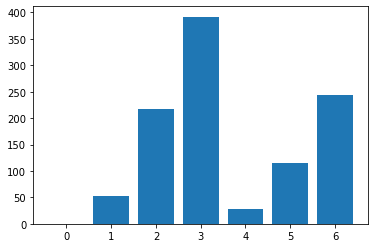

In [101]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [102]:
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf

In [103]:
#Statistics Approach lOGIT non Reference
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
stats1=result.summary()
stats1

Optimization terminated successfully.
         Current function value: 0.491165
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             GEN_HEALTH   No. Observations:                 9687
Model:                          Logit   Df Residuals:                     9680
Method:                           MLE   Df Model:                            6
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                 0.05981
Time:                        08:14:46   Log-Likelihood:                -4757.9
converged:                       True   LL-Null:                       -5060.6
Covariance Type:            nonrobust   LLR p-value:                1.624e-127
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SEX               -0.1914      0.052     -3.693      0.000      -0.293      -0.090
MARITAL_STATUS    -0.8926      0.049    -18.126      0.000      -0.989      -0.796
EMPLOY            -0.0597      0.032     -1.878      0.060      -0.122       0.003
DEPRESS            0.6726      0.063     10.656      0.000       0.549       0.796
AGE_BINS          -0.3850      0.034    -11.255      0.000      -0.452      -0.318
COLLEGE           -1.3306      0.048    -27.773      0.000      -1.424      -1.237
CHRONIC            0.6777      0.058     11.596      0.000       0.563       0.792
==================================================================================
"""

In [104]:
stats2=result.summary2()
stats2

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.060      
Dependent Variable: GEN_HEALTH       AIC:              9529.8272  
Date:               2022-04-19 08:15 BIC:              9580.0770  
No. Observations:   9687             Log-Likelihood:   -4757.9    
Df Model:           6                LL-Null:          -5060.6    
Df Residuals:       9680             LLR p-value:      1.6244e-127
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
SEX               -0.1914   0.0518  -3.6933 0.0002 -0.2930 -0.0898
MARITAL_STATUS    -0.8926   0.0492 -18.1265 0.0000 -0.9891 -0.7961
EMPLOY            -0.0597   0.0318  -1.8777 0.0604 -0.1220  0.0026
DEPRESS            0.6726   0.0631  10.6558 0.0000  0.5489  0.7963
AGE_BINS          -0.3850   0.0342 -11.2546 0.0000 -0.4521 -0.3180
COLLEGE           -1.3306   0.0479 -27.7725 0.0000 -1.4245 -1.2367
CHRONIC            0.6777   0.0584  11.5956 0.0000  0.5631  0.7922
==================================================================

"""

In [105]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                      5%       95%  Odds Ratio
SEX             0.746039  0.914089    0.825800
MARITAL_STATUS  0.371894  0.451080    0.409578
EMPLOY          0.885164  1.002618    0.942062
DEPRESS         1.731277  2.217266    1.959260
AGE_BINS        0.636314  0.727629    0.680442
COLLEGE         0.240636  0.290350    0.264327
CHRONIC         1.756140  2.208256    1.969265


In [106]:
#STATISTICS LOGIT BY REFERENCE
formula = "GEN_HEALTH ~ C(SEX, Treatment(reference=0)) + C(AGE_BINS, Treatment(reference=0)) + C(MARITAL_STATUS, Treatment(reference=0)) + C(EMPLOY, Treatment(reference=0)) + C(DEPRESS, Treatment(reference=0)) + C(CHRONIC, Treatment(reference=0)) + C(COLLEGE, Treatment(reference=0))"
log_reg = smf.logit(formula, data=nhis).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.422672
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             GEN_HEALTH   No. Observations:                12916
Model:                          Logit   Df Residuals:                    12905
Method:                           MLE   Df Model:                           10
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.1909
Time:                        08:15:09   Log-Likelihood:                -5459.2
converged:                       True   LL-Null:                       -6747.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.9689      0.138    -14.251      0.000      -2.240      -1.698
C(SEX, Treatment(reference=0))[T.1]                0.3585      0.050      7.142      0.000       0.260       0.457
C(AGE_BINS, Treatment(reference=0))[T.1]          -0.2518      0.069     -3.633      0.000      -0.388      -0.116
C(AGE_BINS, Treatment(reference=0))[T.2]          -0.0789      0.076     -1.033      0.302      -0.229       0.071
C(MARITAL_STATUS, Treatment(reference=0))[T.1]    -0.1964      0.051     -3.883      0.000      -0.296      -0.097
C(EMPLOY, Treatment(reference=0))[T.1]            -0.9487      0.132     -7.211      0.000      -1.207      -0.691
C(EMPLOY, Treatment(reference=0))[T.2]            -0.1188      0.129     -0.921      0.357      -0.372       0.134
C(EMPLOY, Treatment(reference=0))[T.3]             1.3858      0.141      9.816      0.000       1.109       1.662
C(DEPRESS, Treatment(reference=0))[T.1]            0.8049      0.058     13.859      0.000       0.691       0.919
C(CHRONIC, Treatment(reference=0))[T.1]            1.4829      0.070     21.239      0.000       1.346       1.620
C(COLLEGE, Treatment(reference=0))[T.1]           -0.6993      0.049    -14.401      0.000      -0.794      -0.604
==================================================================================================================
"""

In [107]:
log = log_reg.summary2()
log

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
===============================================================================================
Model:                        Logit                      Pseudo R-squared:           0.191     
Dependent Variable:           GEN_HEALTH                 AIC:                        10940.4670
Date:                         2022-04-19 08:15           BIC:                        11022.5954
No. Observations:             12916                      Log-Likelihood:             -5459.2   
Df Model:                     10                         LL-Null:                    -6747.5   
Df Residuals:                 12905                      LLR p-value:                0.0000    
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               7.0000                                                           
-----------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------------------
Intercept                                      -1.9689   0.1382 -14.2509 0.0000 -2.2397 -1.6981
C(SEX, Treatment(reference=0))[T.1]             0.3585   0.0502   7.1417 0.0000  0.2601  0.4569
C(AGE_BINS, Treatment(reference=0))[T.1]       -0.2518   0.0693  -3.6327 0.0003 -0.3877 -0.1160
C(AGE_BINS, Treatment(reference=0))[T.2]       -0.0789   0.0764  -1.0331 0.3016 -0.2287  0.0708
C(MARITAL_STATUS, Treatment(reference=0))[T.1] -0.1964   0.0506  -3.8834 0.0001 -0.2956 -0.0973
C(EMPLOY, Treatment(reference=0))[T.1]         -0.9487   0.1316  -7.2108 0.0000 -1.2065 -0.6908
C(EMPLOY, Treatment(reference=0))[T.2]         -0.1188   0.1291  -0.9206 0.3573 -0.3717  0.1341
C(EMPLOY, Treatment(reference=0))[T.3]          1.3858   0.1412   9.8159 0.0000  1.1091  1.6625
C(DEPRESS, Treatment(reference=0))[T.1]         0.8049   0.0581  13.8591 0.0000  0.6910  0.9187
C(CHRONIC, Treatment(reference=0))[T.1]         1.4829   0.0698  21.2386 0.0000  1.3461  1.6198
C(COLLEGE, Treatment(reference=0))[T.1]        -0.6993   0.0486 -14.4013 0.0000 -0.7945 -0.6041
===============================================================================================

"""

In [108]:
#OddsRatio
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                                      5%       95%  Odds Ratio
Intercept                                       0.106494  0.183032    0.139613
C(SEX, Treatment(reference=0))[T.1]             1.297120  1.579242    1.431247
C(AGE_BINS, Treatment(reference=0))[T.1]        0.678637  0.890518    0.777392
C(AGE_BINS, Treatment(reference=0))[T.2]        0.795570  1.073388    0.924097
C(MARITAL_STATUS, Treatment(reference=0))[T.1]  0.744108  0.907292    0.821659
C(EMPLOY, Treatment(reference=0))[T.1]          0.299240  0.501175    0.387261
C(EMPLOY, Treatment(reference=0))[T.2]          0.689536  1.143549    0.887986
C(EMPLOY, Treatment(reference=0))[T.3]          3.031569  5.272395    3.997953
C(DEPRESS, Treatment(reference=0))[T.1]         1.995785  2.505995    2.236387
C(CHRONIC, Treatment(reference=0))[T.1]         3.842296  5.051910    4.405784
C(COLLEGE, Treatment(reference=0))[T.1]         0.451821  0.546552    0.496935


Machine Learning
====

In [110]:
#Machine Learning K-Fold Validation Accuracy
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=10)
scores

array([0.81114551, 0.79798762, 0.80882353, 0.80495356, 0.79721362,
       0.79798762, 0.8140976 , 0.81099923, 0.81022463, 0.81177382])

In [111]:
#Prediction
model1 = LogisticRegression().fit(X_train, y_train)
preds = model1.predict(X_test)

In [112]:
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-3.57333754]
Coefficients: 
 [[ 0.20021733 -0.21601487  0.850085    0.83538299 -0.15188553 -0.76219789
   1.53994718]]


In [113]:
#Calculate odds ratio estimates
import numpy as np
oddsratio = np.exp(model1.coef_)

In [114]:
oddsratio = pd.DataFrame(oddsratio)

In [115]:
#Change Column Name if necessary
oddsratio.rename({0:'COVIDCONCERN',1: 'GENDER',2: 'MARRIAGE',3: 'DEPRESSION',
       4:'AGE_BINS', 5:'COLLEGE',6: 'CHRONIC',7: 'EMPLOY_1.0',8: 'EMPLOY_2.0'}, axis=1, inplace=True)

In [116]:
oddsratio.T

,0
COVIDCONCERN,1.221668
GENDER,0.805723
MARRIAGE,2.339846
DEPRESSION,2.305697
AGE_BINS,0.859087
COLLEGE,0.466640
CHRONIC,4.664344


In [117]:
confusion_matrix(y_test, preds)

array([[2447,   83],
       [ 533,  166]], dtype=int64)

In [118]:
confmtrx = np.array(confusion_matrix(y_test, preds))

In [122]:
pd.DataFrame(confmtrx, index=['Good','Bad'],
columns=['predicted_Good','predicted_Bad'])

,predicted_Good,predicted_Bad
Good,2447,83
Bad,533,166


In [123]:
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

Accuracy Score: 0.809228863425209


In [124]:
class_report=classification_report(y_test, preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2530
           1       0.67      0.24      0.35       699

    accuracy                           0.81      3229
   macro avg       0.74      0.60      0.62      3229
weighted avg       0.79      0.81      0.77      3229



In [127]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Good','Bad']); ax.yaxis.set_ticklabels(['Good','Bad'])

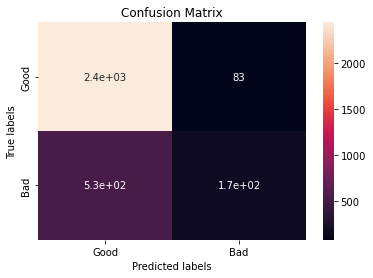

In [128]:
yhat = model1.predict(X_test)
plot_confusion_matrix(y_test,yhat)

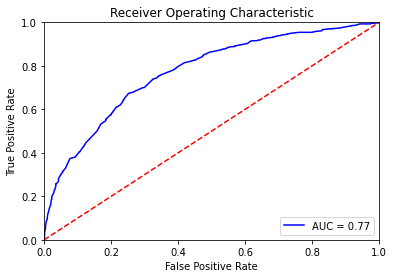

In [129]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()